In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn

In [2]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

Text(0, 0.5, 'Feature 1')

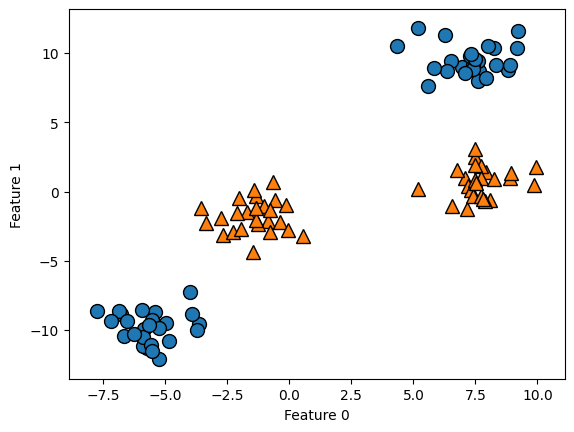

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

Text(0, 0.5, 'Feature 1')

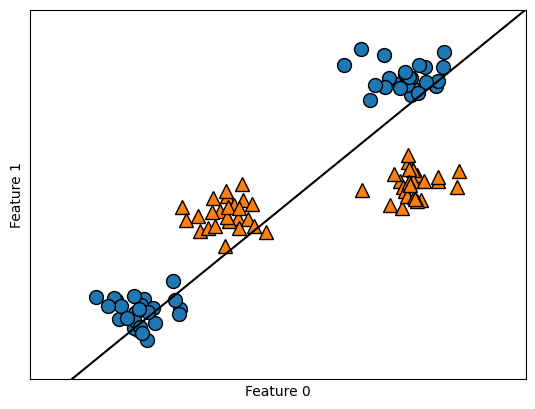

In [ ]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [6]:
import numpy as np
X_new = np.hstack([X, X[:, 1:] ** 2])

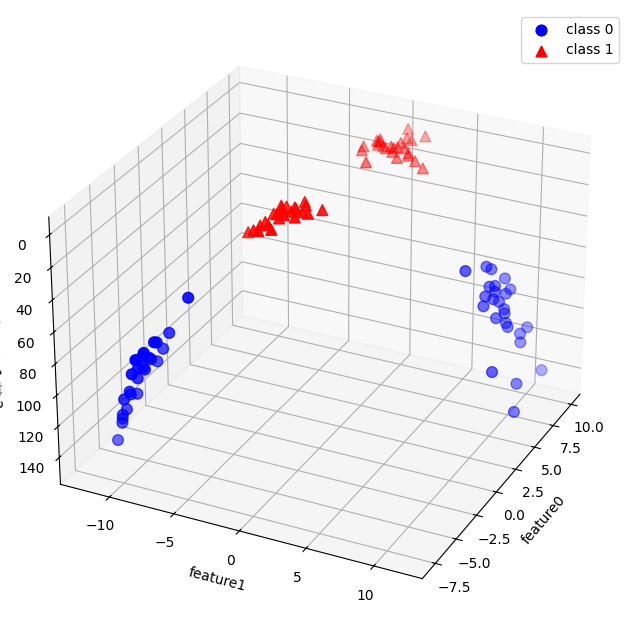

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 8))  # 図のサイズを大きく
ax = figure.add_subplot(111, projection="3d", elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", s=60, label="class 0")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", s=60, label="class 1")
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")
ax.legend()
plt.show()

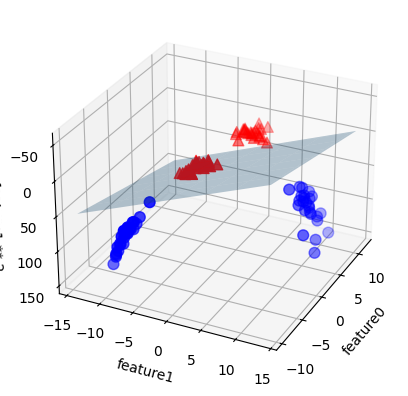

In [18]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = figure.add_subplot(111, projection="3d", elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")
plt.show()

Text(0, 0.5, 'Feature 1')

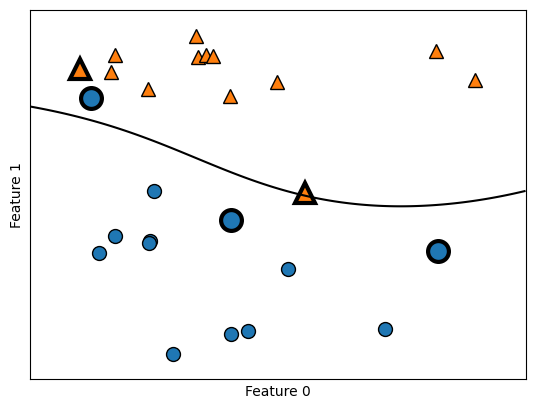

In [19]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# サポートベクタをプロット
sv = svm.support_vectors_
# サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

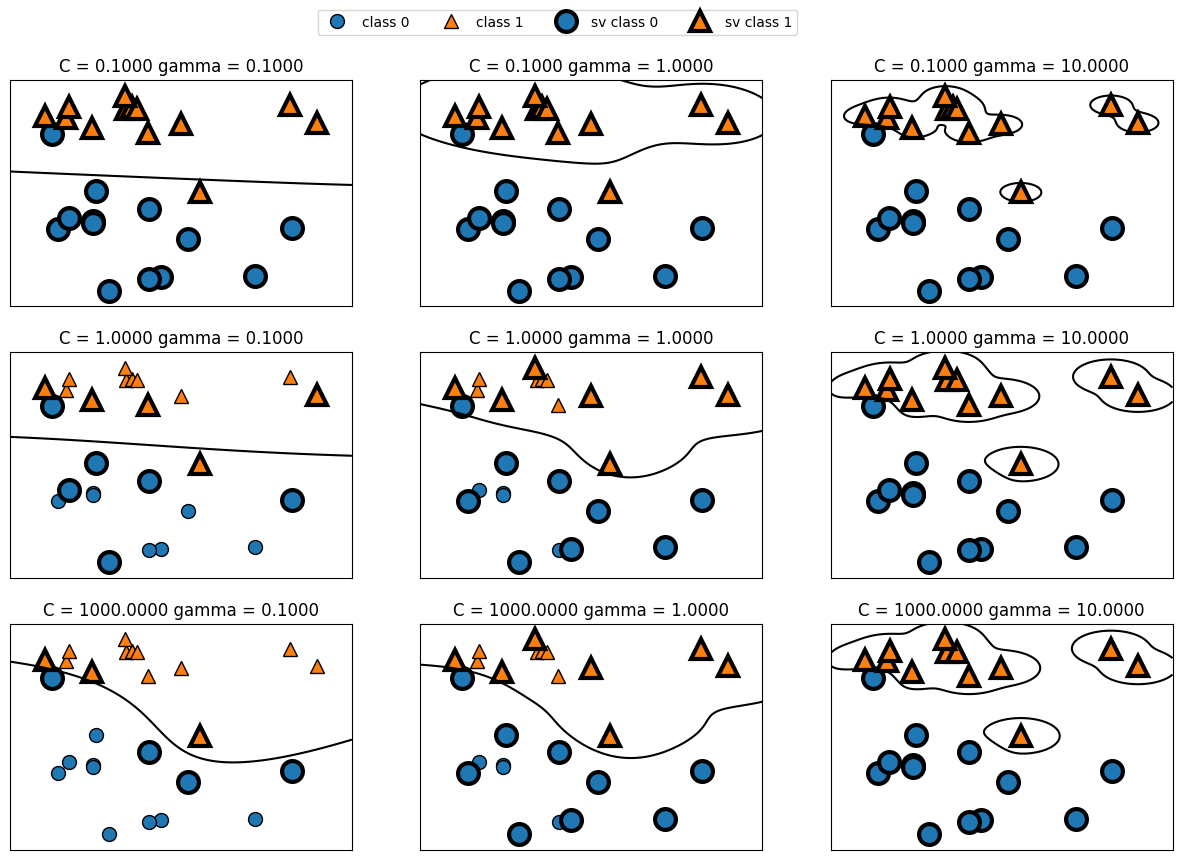

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                   ncol=4, loc=(0.9, 1.2))

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [46]:
cancer = load_breast_cancer()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], stratify=cancer["target"], random_state=0)

In [48]:
svc = SVC(gamma=1/len(cancer["feature_names"]))
svc.fit(X_train, y_train)

SVC(gamma=0.03333333333333333)

In [49]:
print(f"Accuracy on train set: {svc.score(X_train, y_train)}")
print(f"Accuracy on test set: {svc.score(X_test, y_test)}")

Accuracy on train set: 1.0
Accuracy on test set: 0.6293706293706294


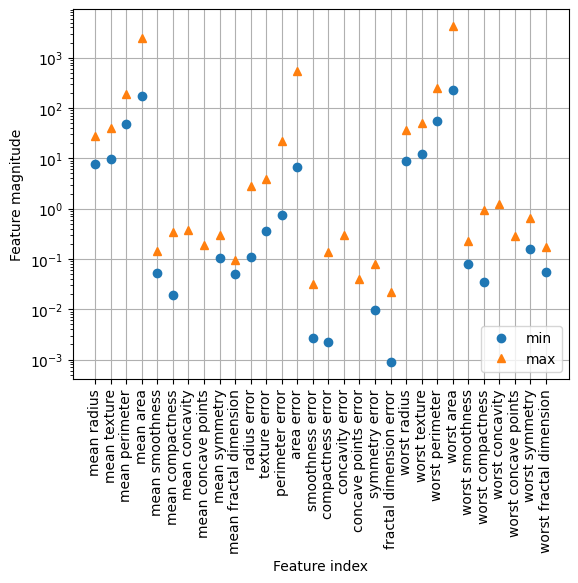

In [50]:
plt.plot(X_train.min(axis=0), "o", label="min")
plt.plot(X_train.max(axis=0), "^", label="max")
plt.legend(loc=4)
plt.xticks(np.arange(len(cancer["feature_names"])), cancer["feature_names"], rotation=90)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")
plt.grid()

In [51]:
# trainデータ内のデータで最小のものを特徴量(列)ごとに取る
min_on_train = X_train.min(axis=0)
# X_trainの行にmin_on_train特徴量の最小値を引いた後に、特徴量ごとに最大値を取り出す(差の最大値)
range_on_train = (X_train - min_on_train).max(axis=0)

# range_on_trainは各特徴量の差の最大値のためX_train - min_on_trainで最小値を0にずらして, range_on_trainで割ることで正規化
X_train_scaled = (X_train - min_on_train) / range_on_train
print(f"Minimum for each feature \n{X_train_scaled.min(axis=0)}")
print(f"Maximum for each feature \n{X_train_scaled.max(axis=0)}")

Minimum for each feature 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [52]:
X_test_scaled = (X_test - min_on_train) / range_on_train

In [55]:
svc = SVC(gamma=1/len(cancer["feature_names"]))
svc.fit(X_train_scaled, y_train)
print(f"Accuracy on train set: {svc.score(X_train_scaled, y_train)}")
print(f"Accuracy on test set: {svc.score(X_test_scaled, y_test)}")

Accuracy on train set: 0.9553990610328639
Accuracy on test set: 0.951048951048951


In [81]:
svc = SVC(C=7)
svc.fit(X_train_scaled, y_train)
print(f"svc gamma: {svc._gamma}")
print(f"Accuracy on train set: {svc.score(X_train_scaled, y_train)}")
print(f"Accuracy on test set: {svc.score(X_test_scaled, y_test)}")

svc gamma: 1.0150369370043708
Accuracy on train set: 0.9953051643192489
Accuracy on test set: 0.972027972027972
